In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import scipy.stats as st
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB,GaussianNB,CategoricalNB


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_score


import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test=pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
data=train.append(test)
data.reset_index(inplace=True,drop=True)
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [6]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
data[data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [11]:
cat_features=data.describe(include='object').columns
cat_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [12]:
num_features=data.describe(include=['int64','float64']).columns
num_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

In [16]:
for i in cat_features:
    unique=data[i].value_counts()
    print()
    print(unique)


 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales       

In [17]:
for i in cat_features:
    print(i,'contains',len(data[i].unique()),'categories.')

workclass contains 7 categories.
education contains 16 categories.
maritalstatus contains 7 categories.
occupation contains 14 categories.
relationship contains 6 categories.
race contains 5 categories.
sex contains 2 categories.
native contains 40 categories.
Salary contains 2 categories.


In [18]:
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


<Axes: >

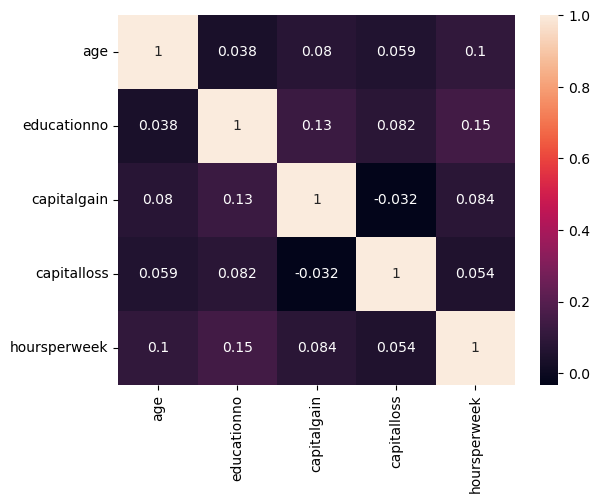

In [19]:
sn.heatmap(data.corr(),annot=True)

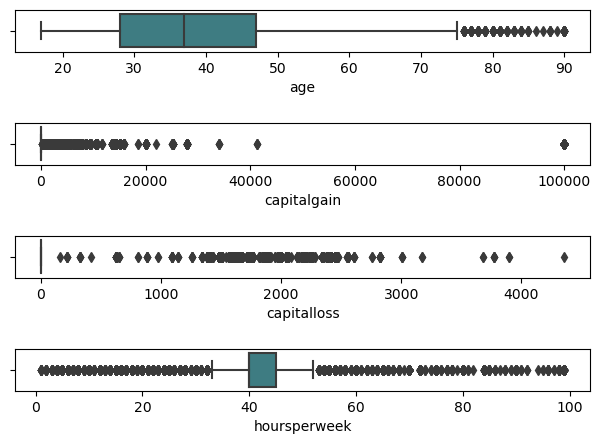

In [20]:
ot=data.copy() 
fig, axes=plt.subplots(4,1)
sn.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sn.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sn.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sn.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

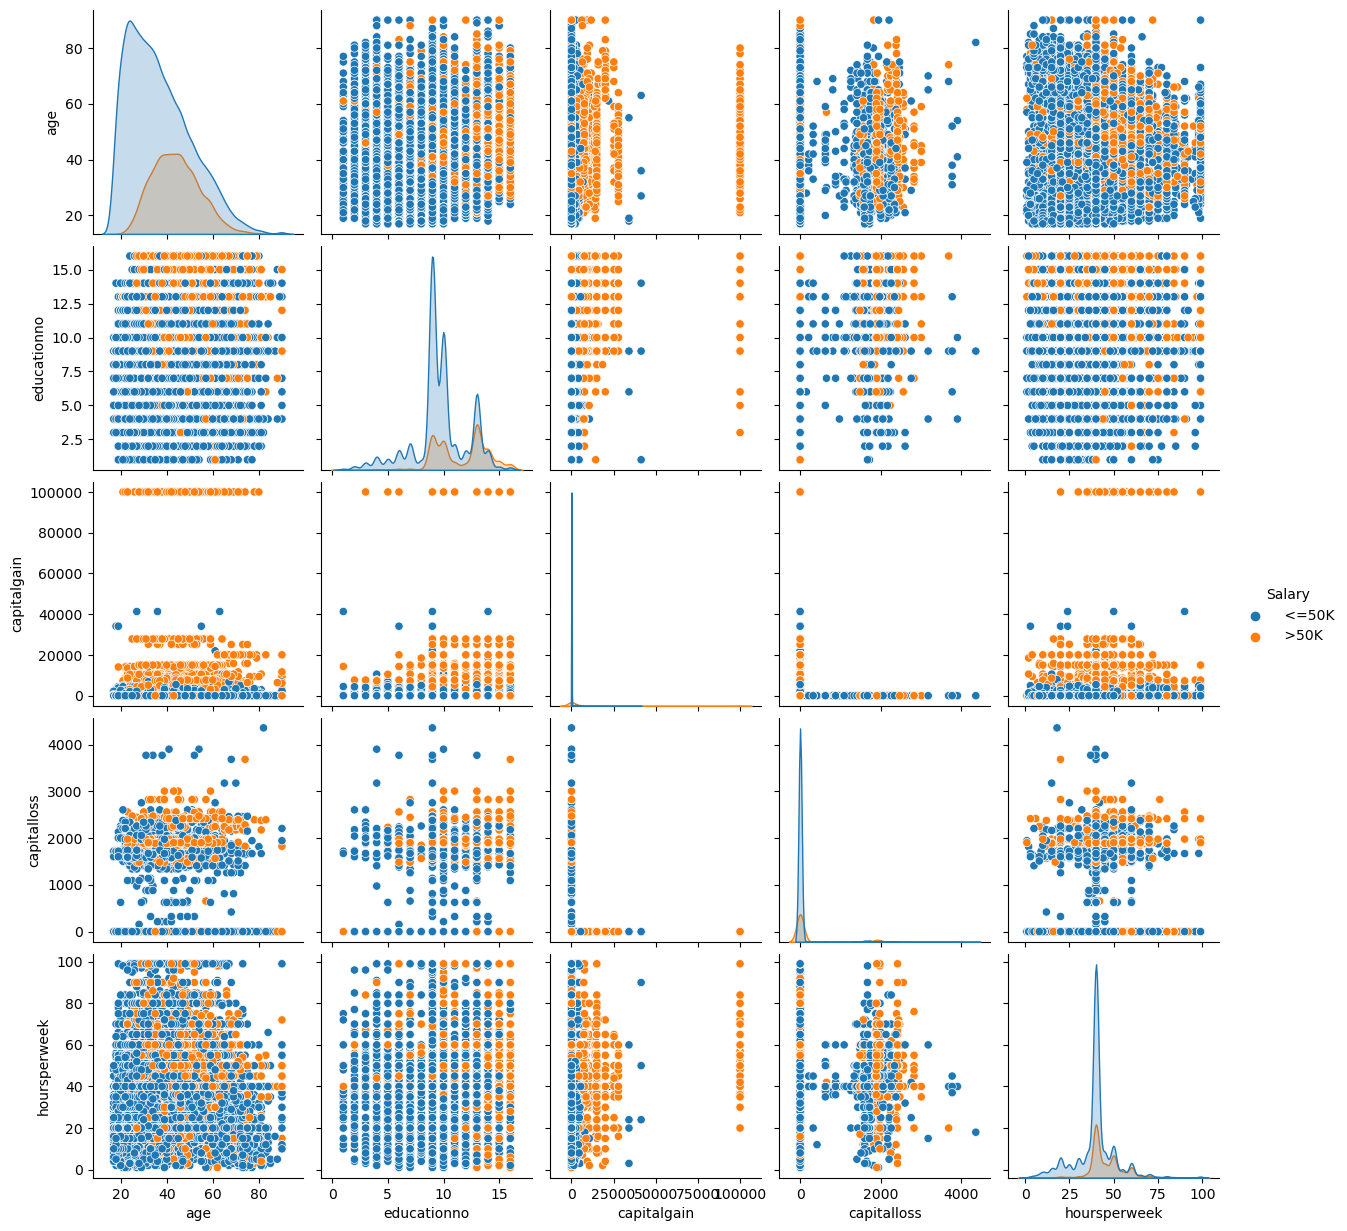

In [21]:
sn.pairplot(data,hue='Salary')

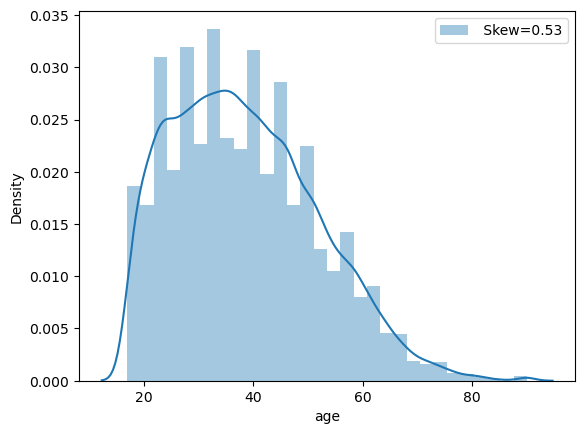

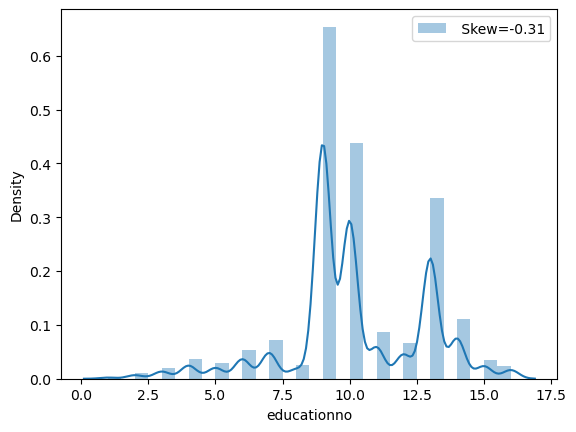

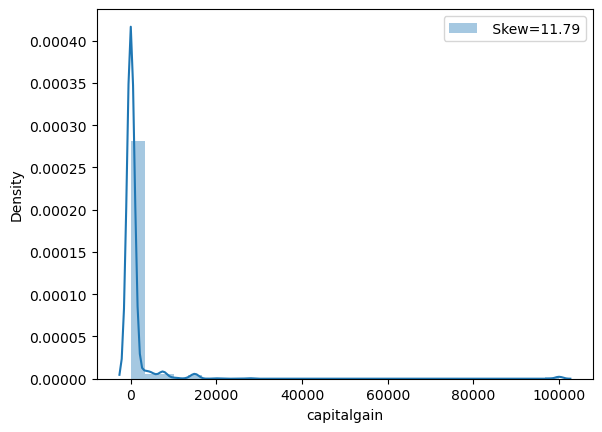

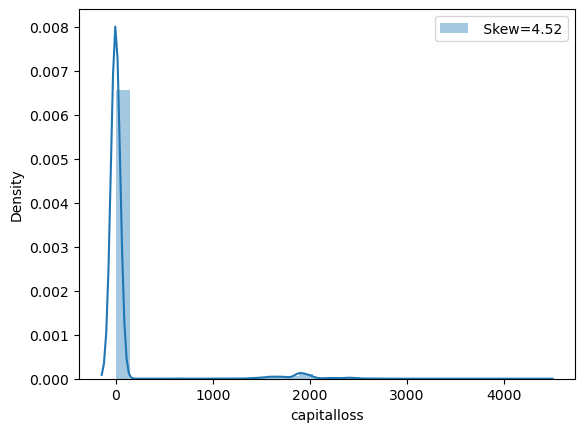

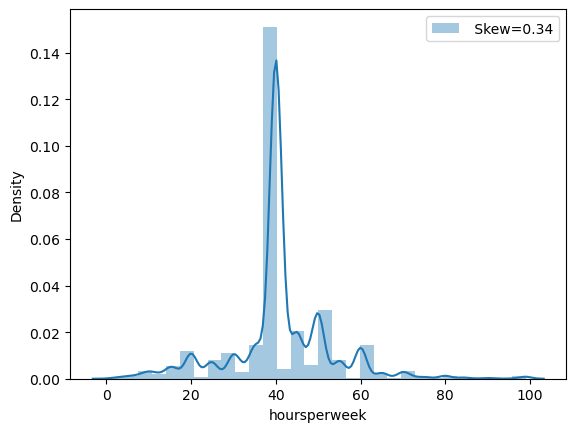

In [22]:
for i in num_features:
    skew=data[i].skew()
    sn.distplot(data[i],kde=True,label=' Skew=%.2f'%(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

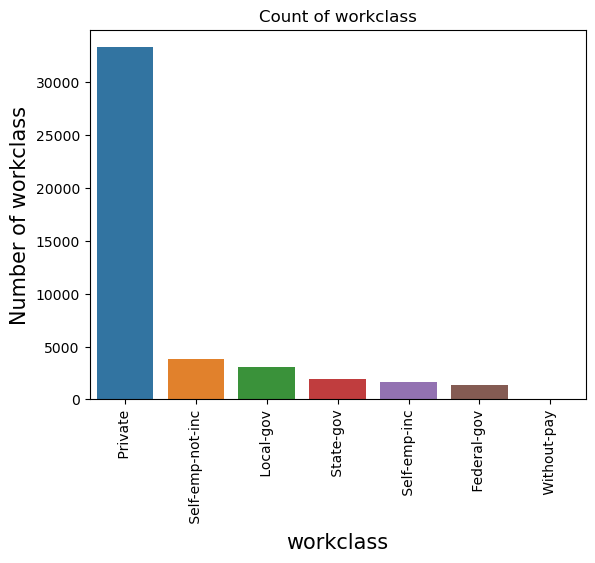

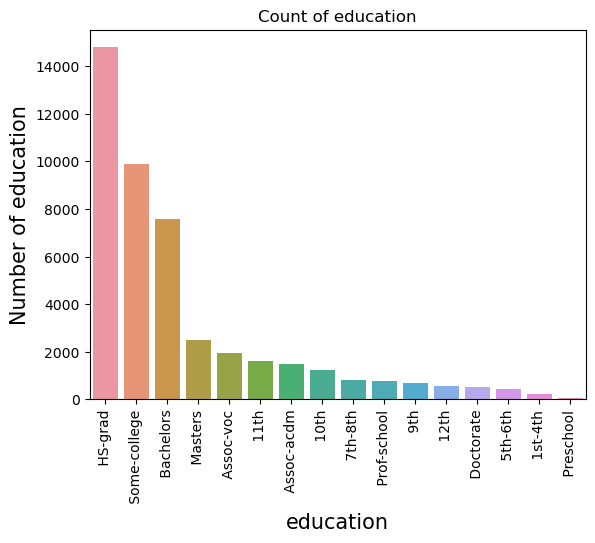

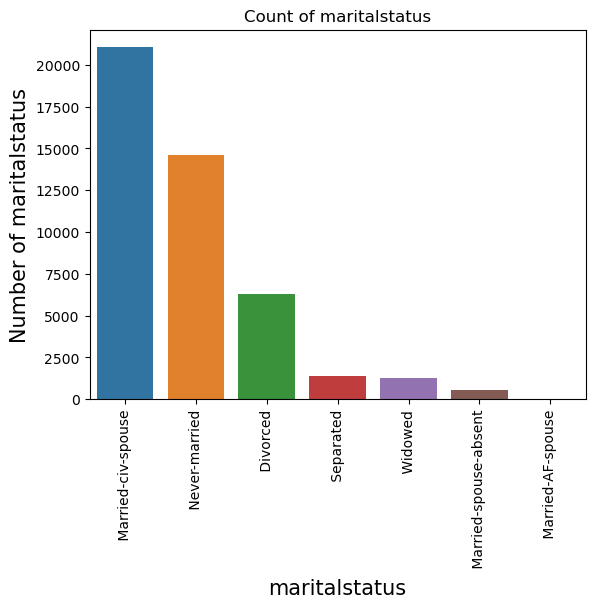

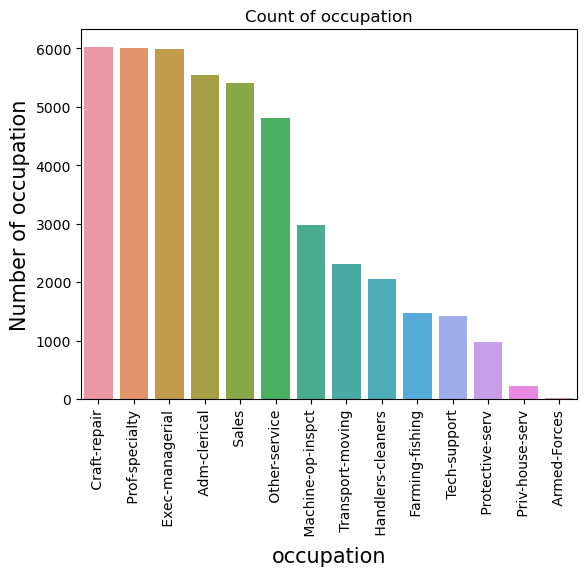

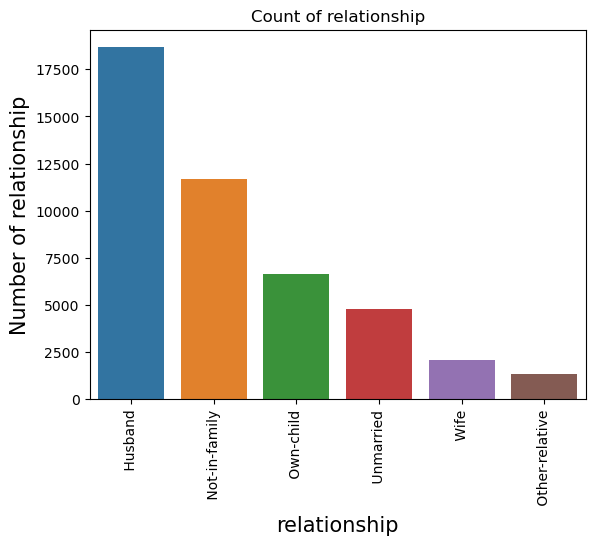

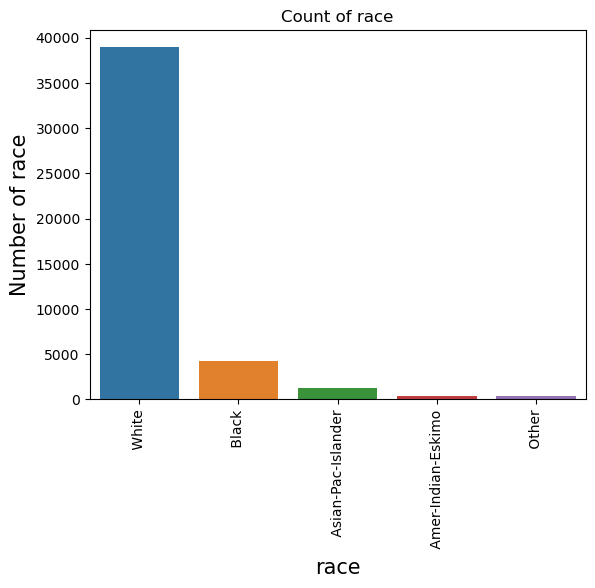

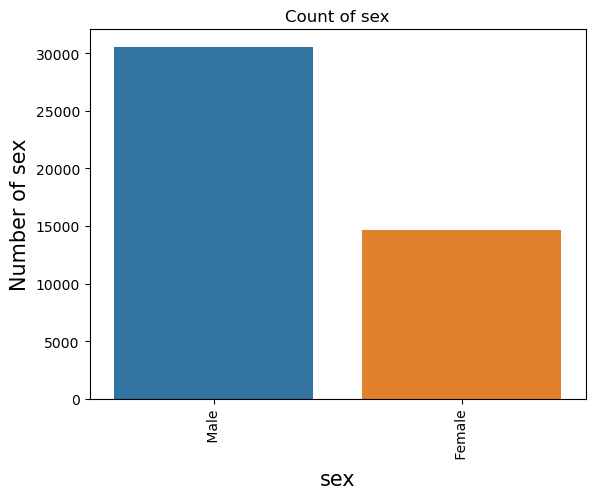

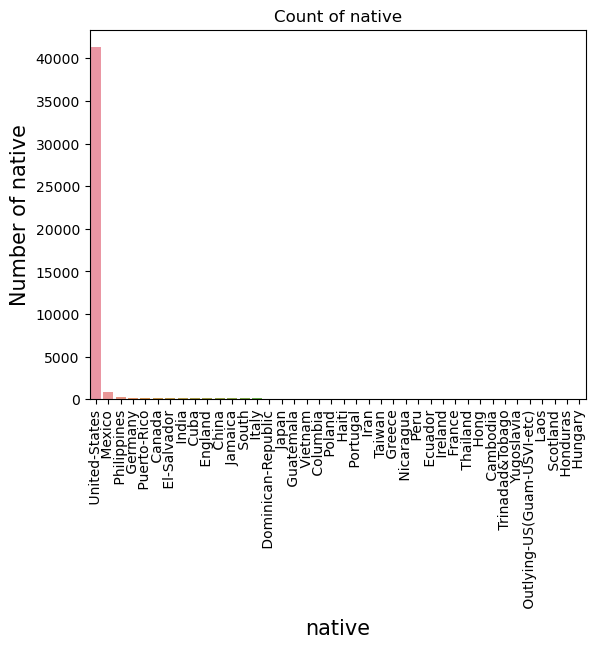

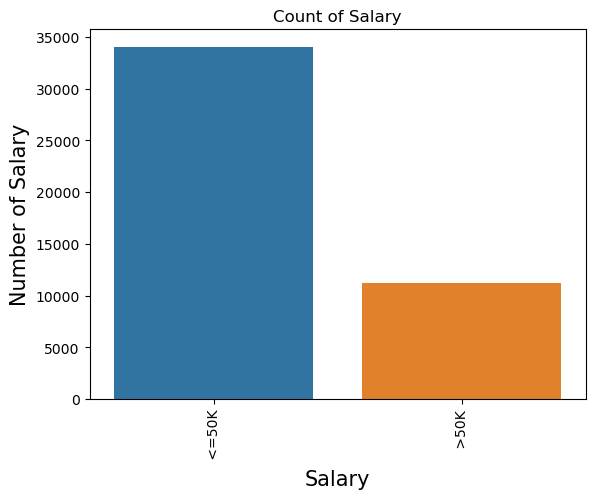

In [23]:
for i,column in enumerate (cat_features):
    unique=data[column].value_counts()
    plt.title('Count of ' + column)
    ax=sn.countplot(data=data,x=column,order=data[column].value_counts().index,);
    plt.xlabel(column,fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of '+ column,fontsize=15)
    plt.show()
    print()

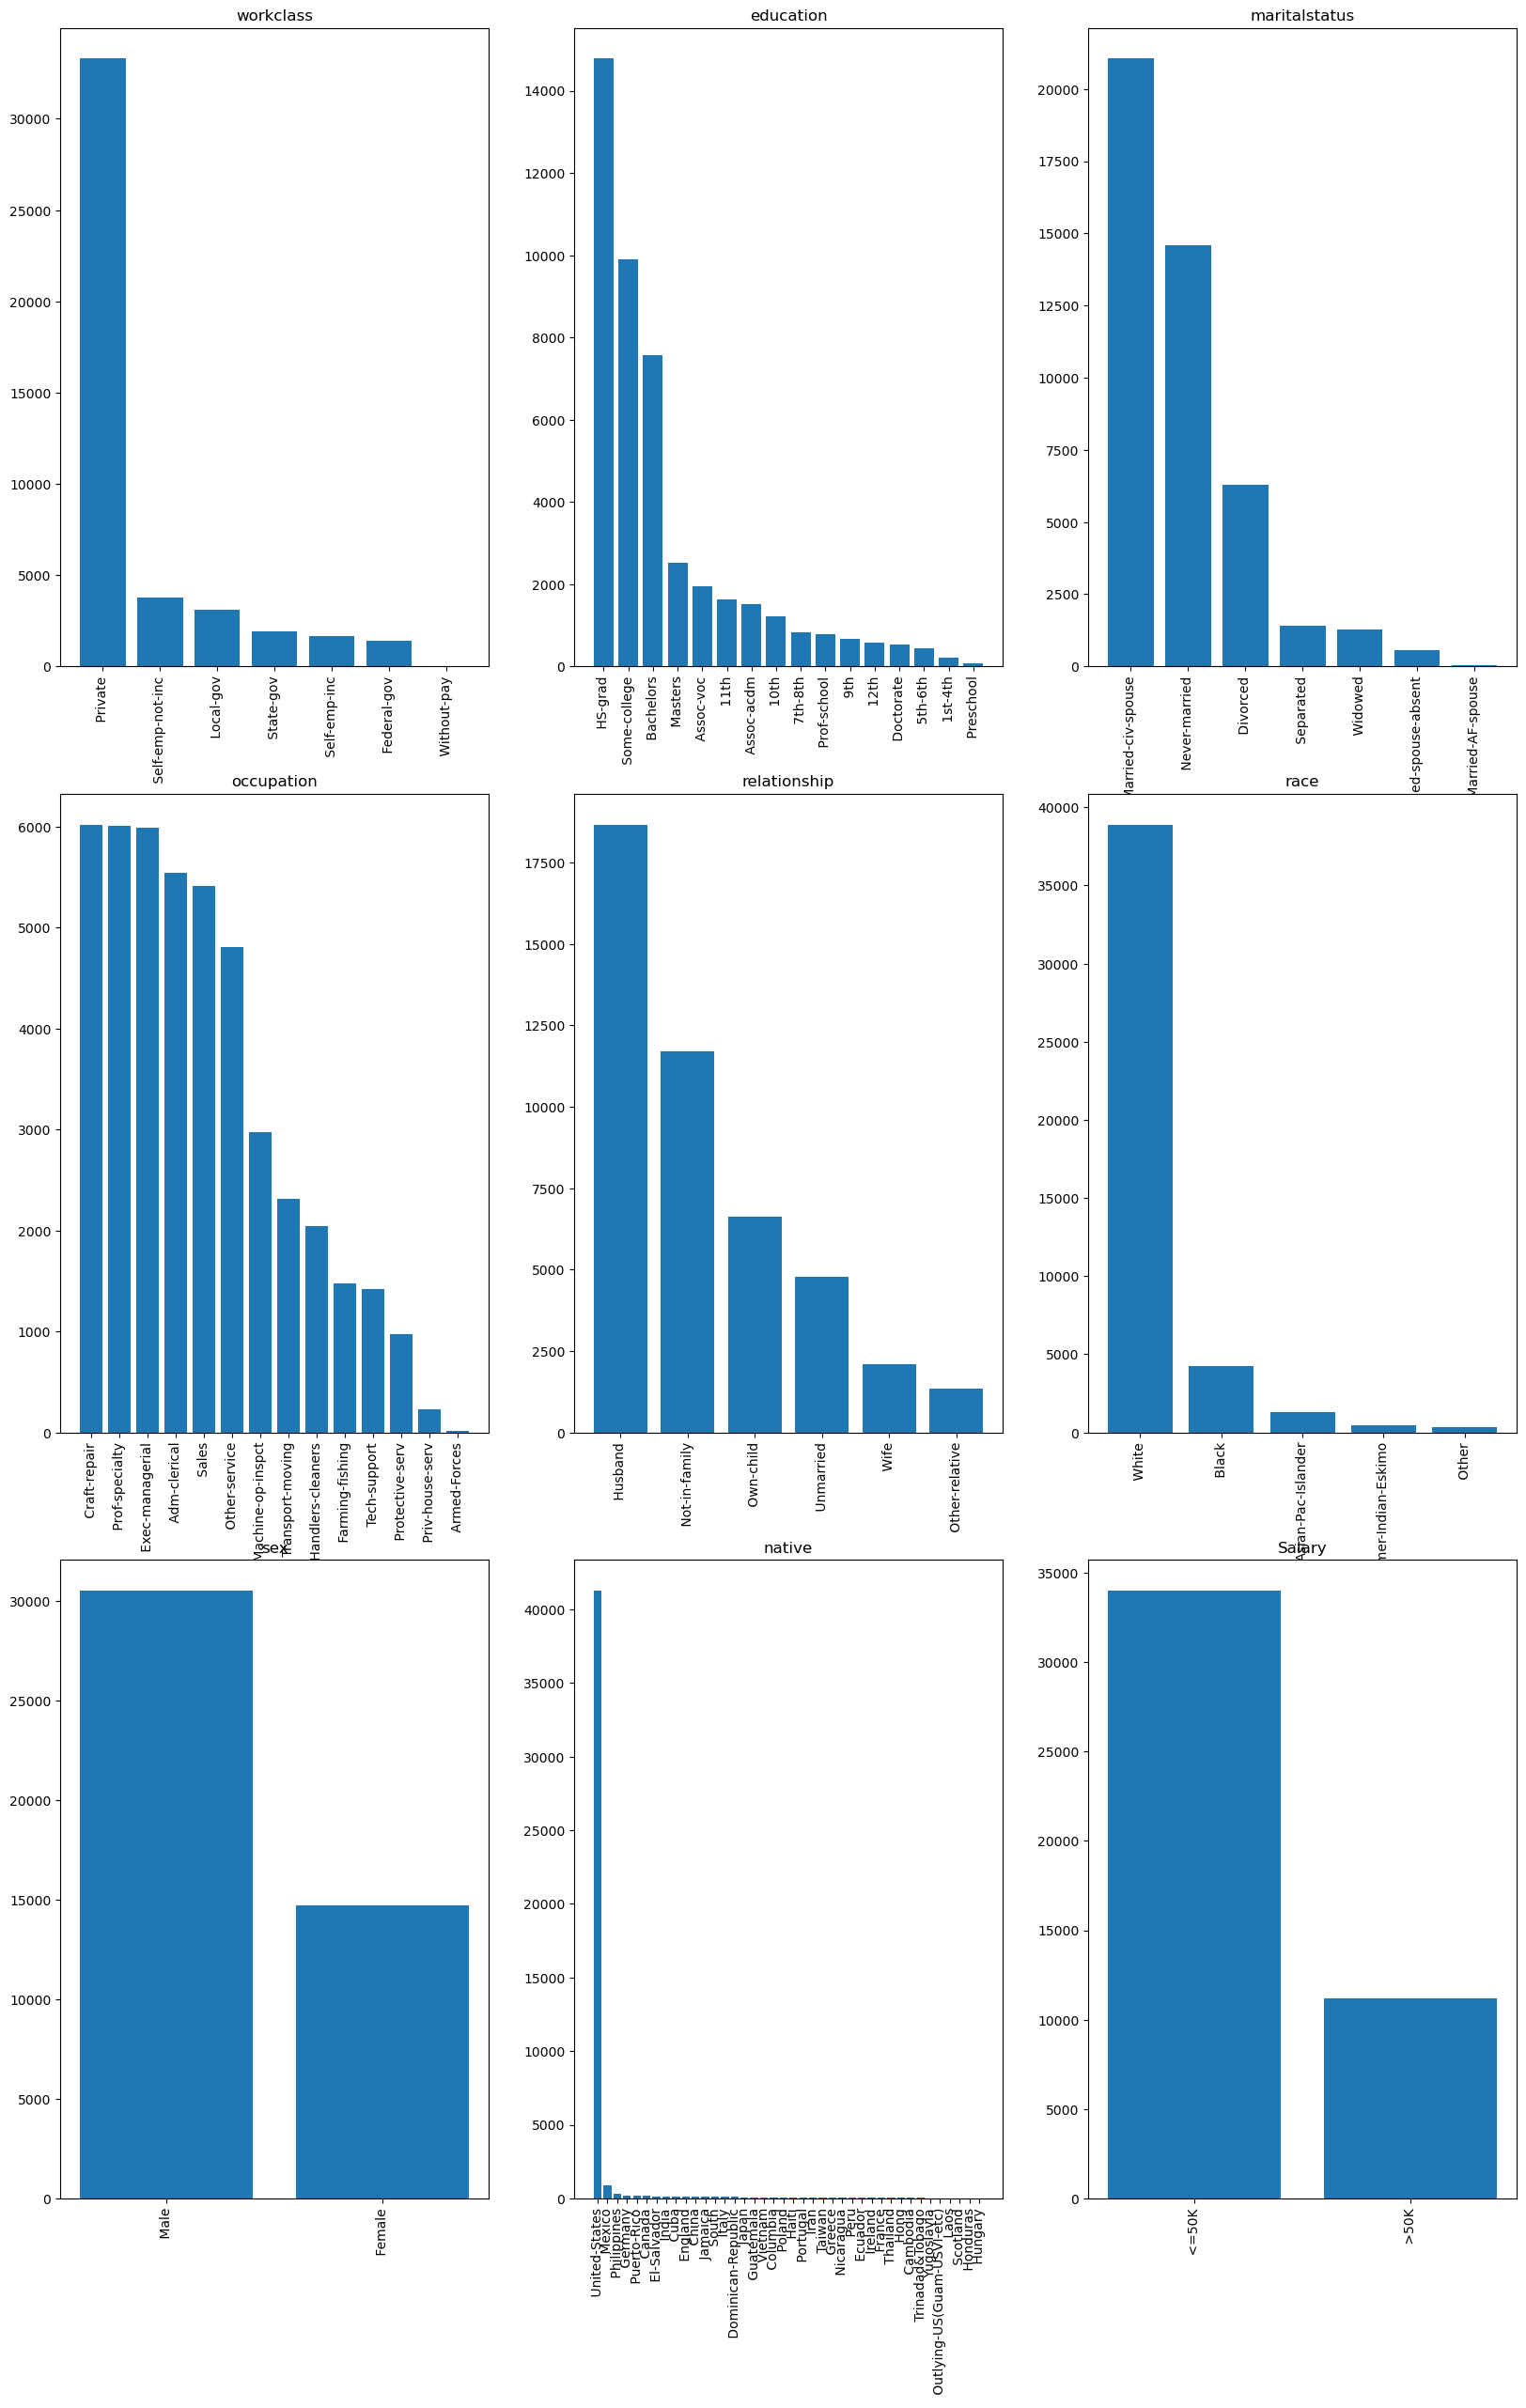

In [24]:
fig, axs = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,30))

counter = 0
for cat_column in cat_features:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
    
plt.show()

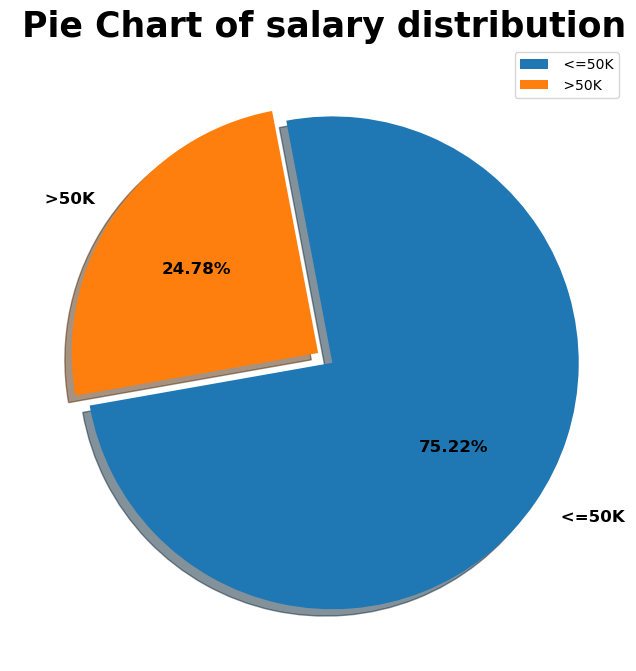

In [25]:
plt.figure(figsize = (12,8))
plt.pie(data['Salary'].value_counts(),
       labels=data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'best')
plt.title(" Pie Chart of salary distribution", fontsize =25, fontweight = 'bold')
plt.show()

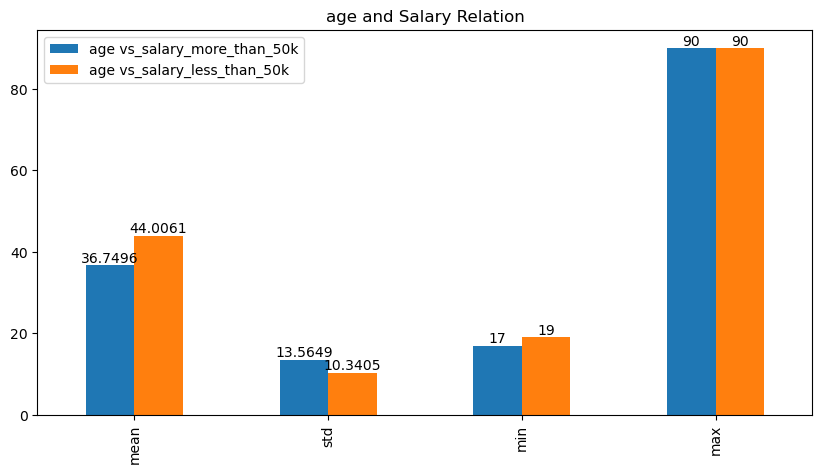

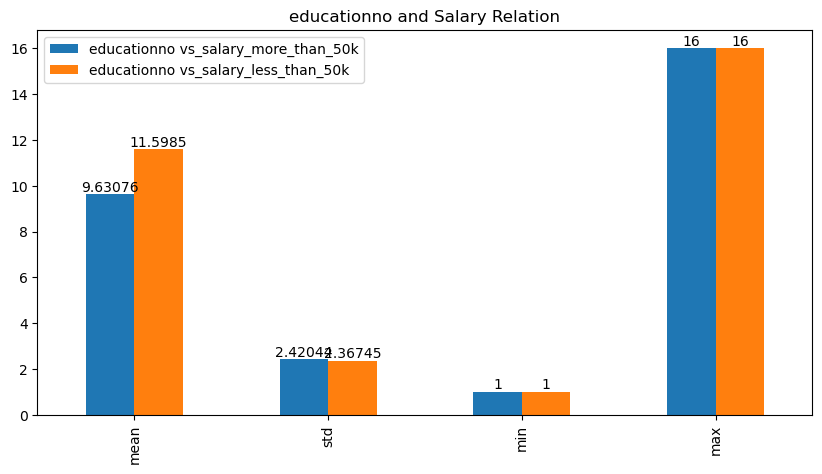

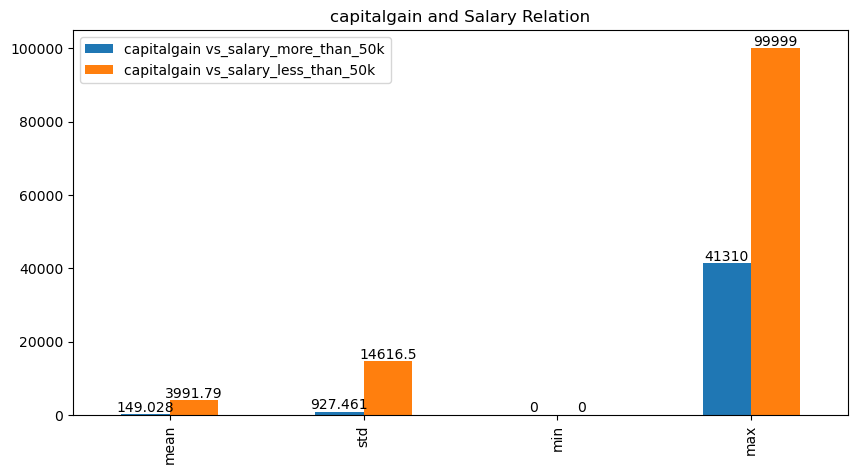

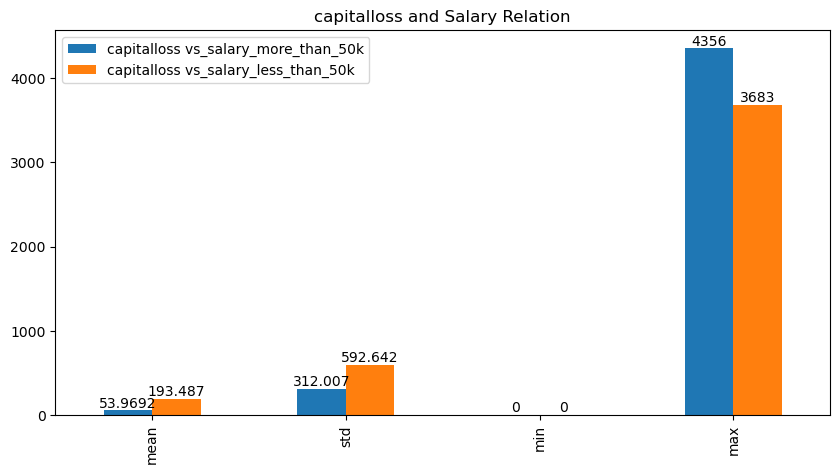

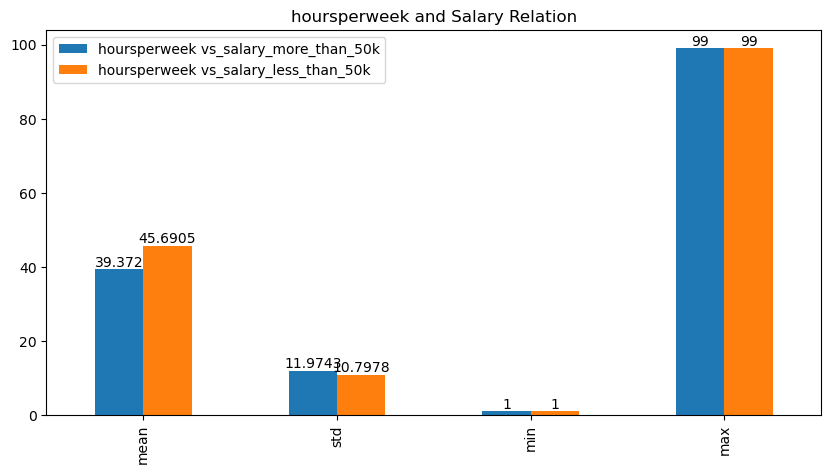

In [26]:
for i in num_features:
    a= pd.DataFrame()
    a[i +' vs_salary_more_than_50k'] = (data[data['Salary'] == ' <=50K'][['Salary',i ]].describe())[i]
    a[i +' vs_salary_less_than_50k'] = (data[data['Salary'] == ' >50K'][['Salary', i ]].describe())[i]
    a.drop(['count', '25%', '50%', '75%'],inplace=True)
    ax=a.plot.bar(title = i+ ' and Salary Relation',figsize=(10,5))
    for b in ax.containers:
        ax.bar_label(b,)

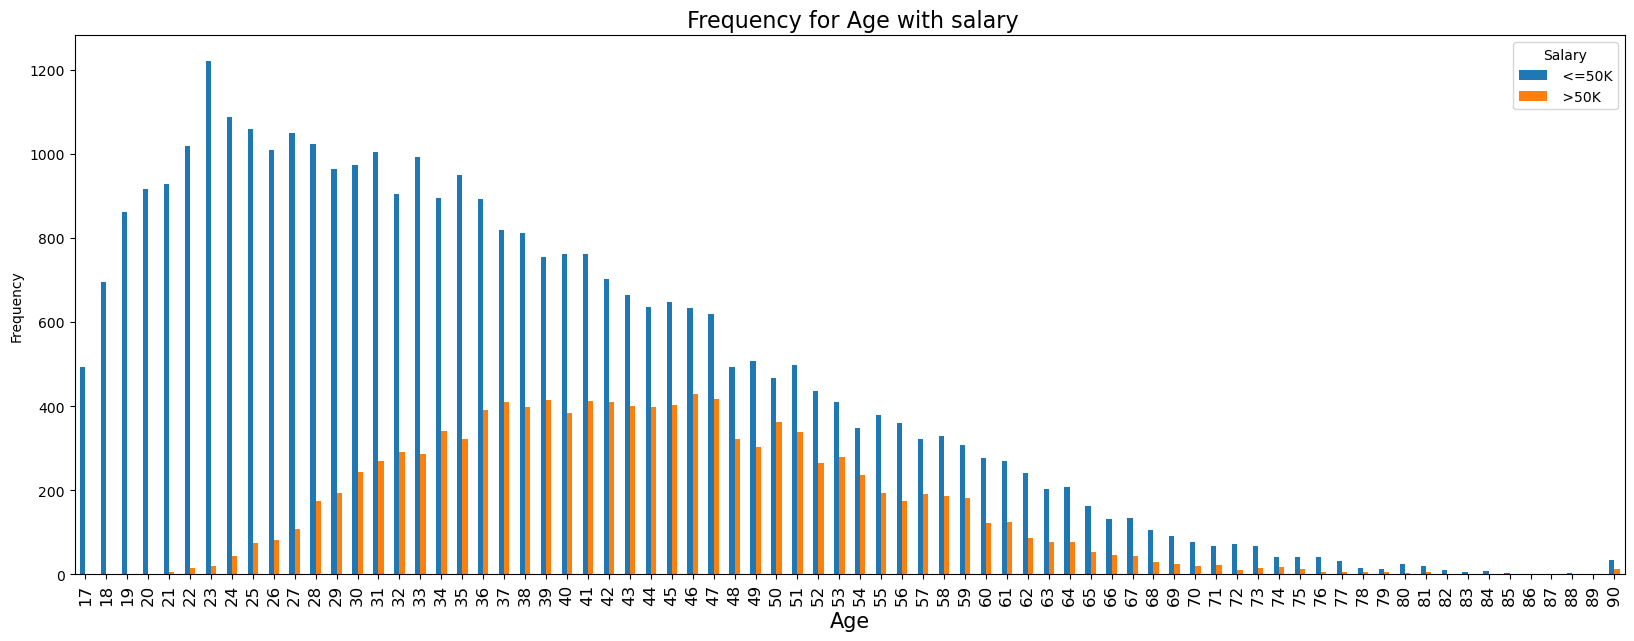

In [27]:
pd.crosstab(data.age,data.Salary).plot(kind="bar",figsize=(20,7))
plt.title(' Frequency for Age with salary', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

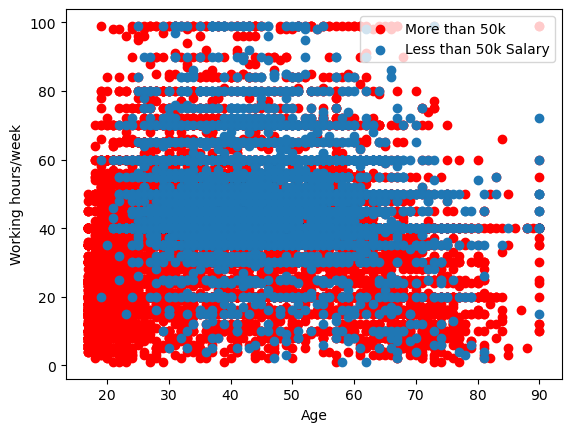

In [28]:
plt.scatter(x=data.age[data.Salary== ' <=50K'], y=data.hoursperweek[(data.Salary== ' <=50K')], c="red")
plt.scatter(x=data.age[data.Salary== ' >50K'], y=data.hoursperweek[(data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

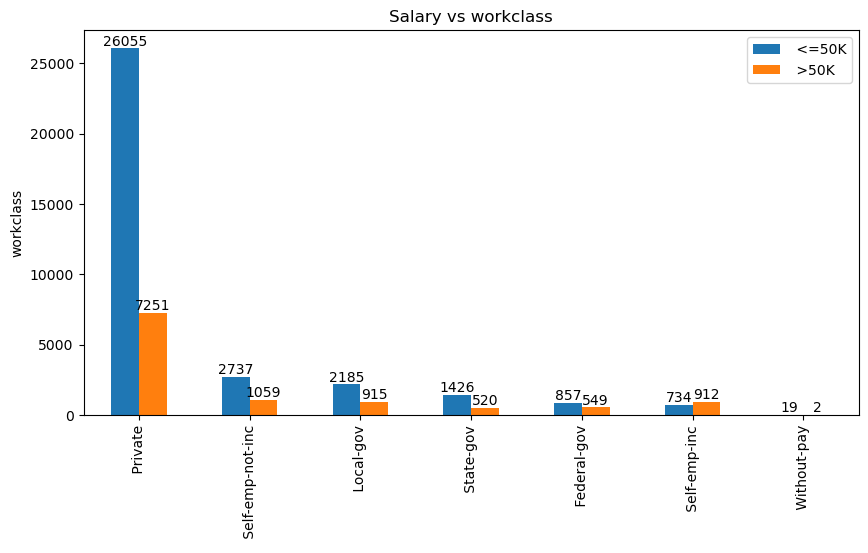

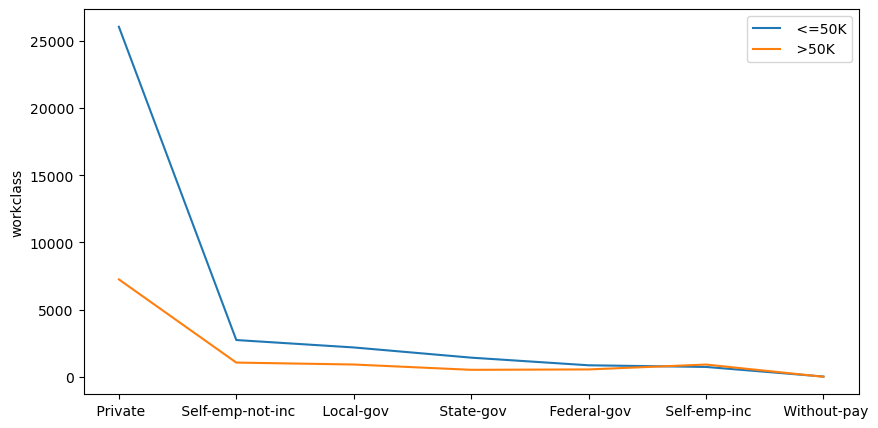

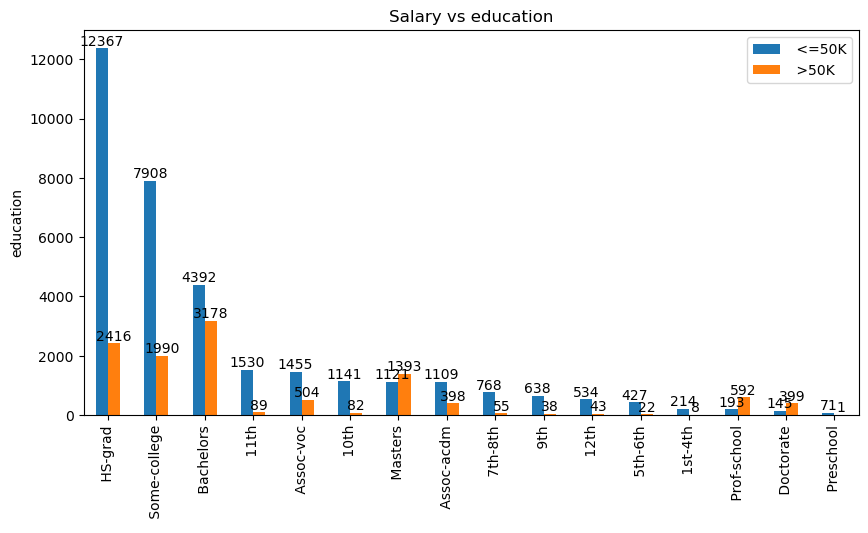

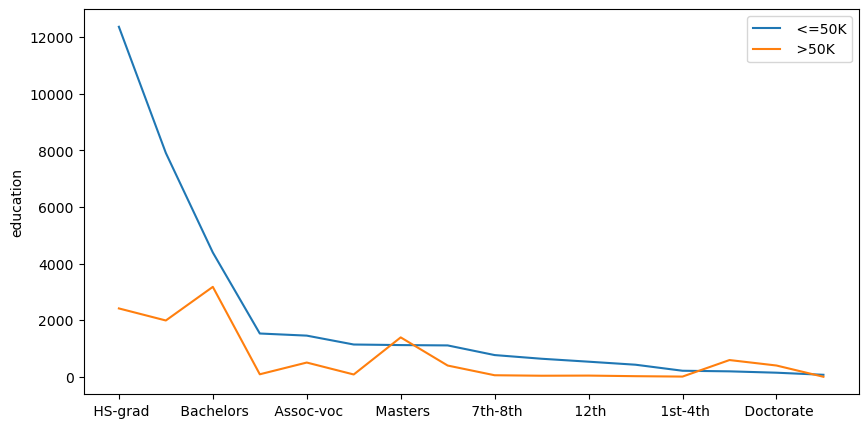

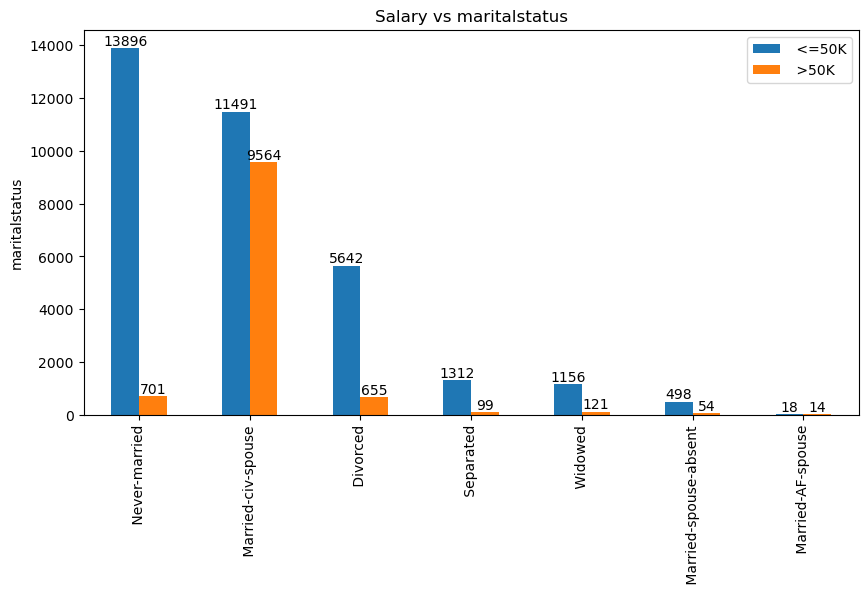

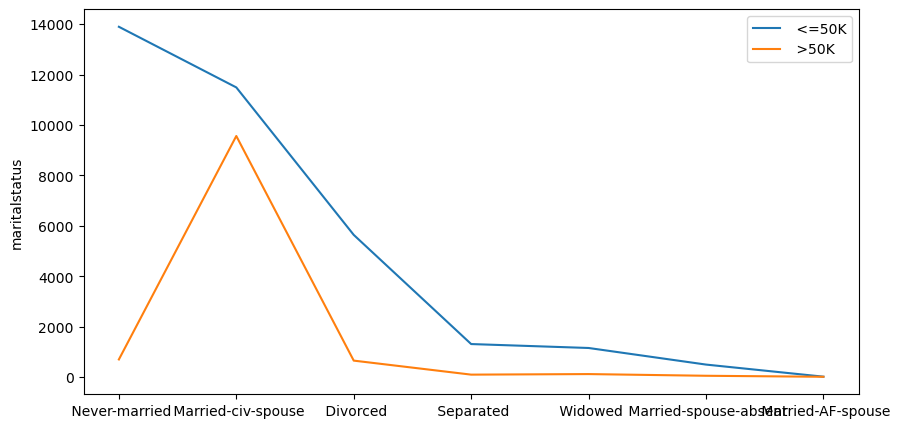

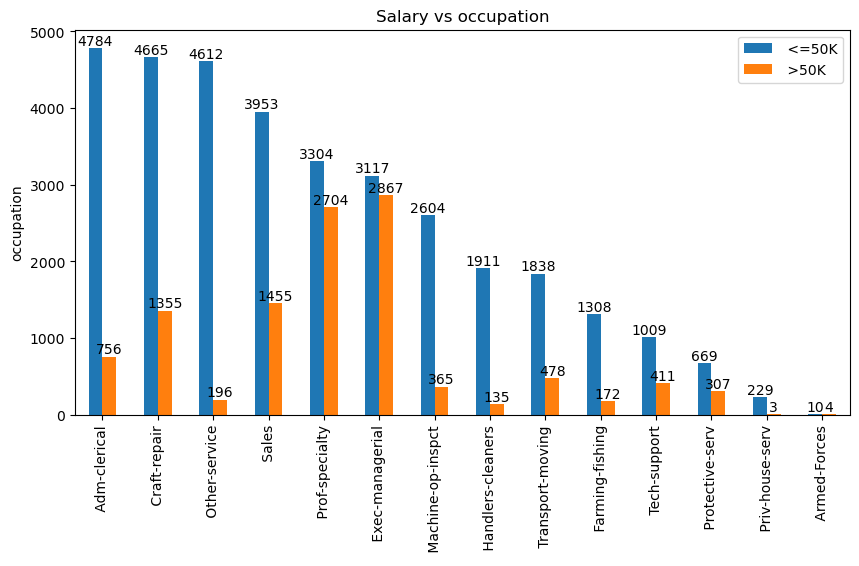

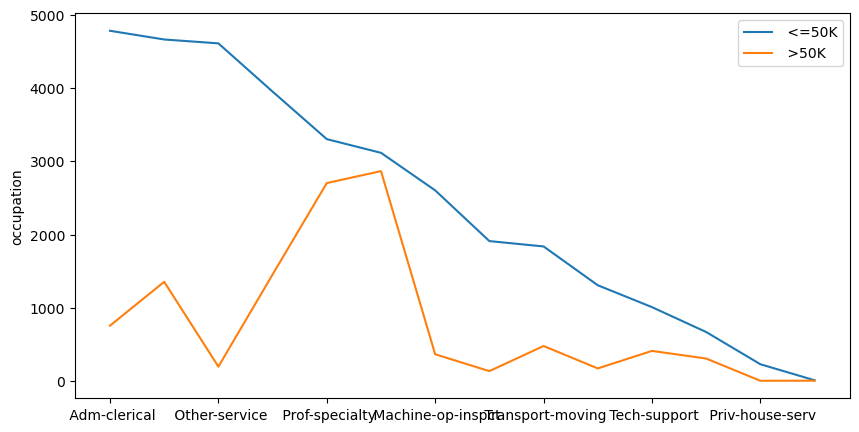

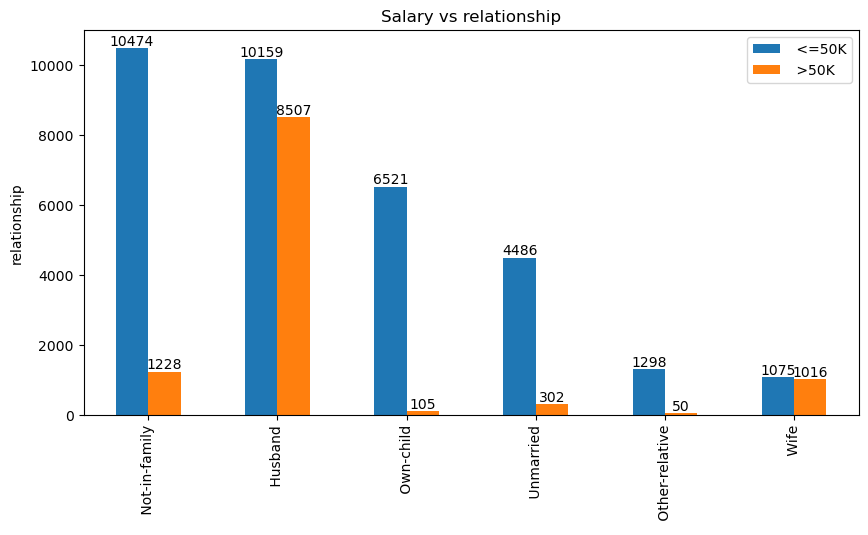

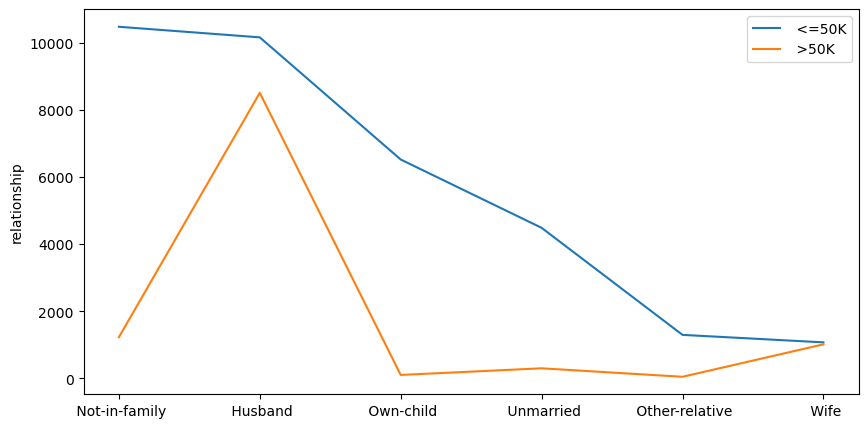

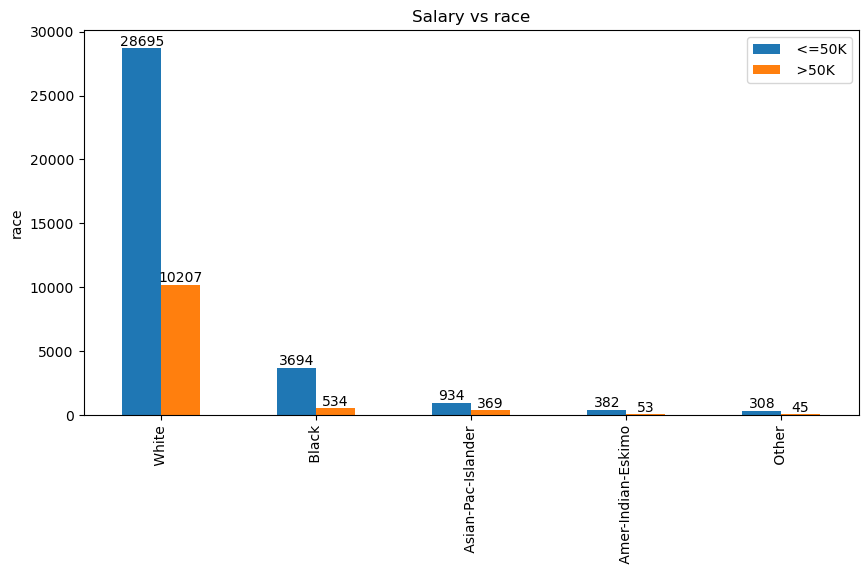

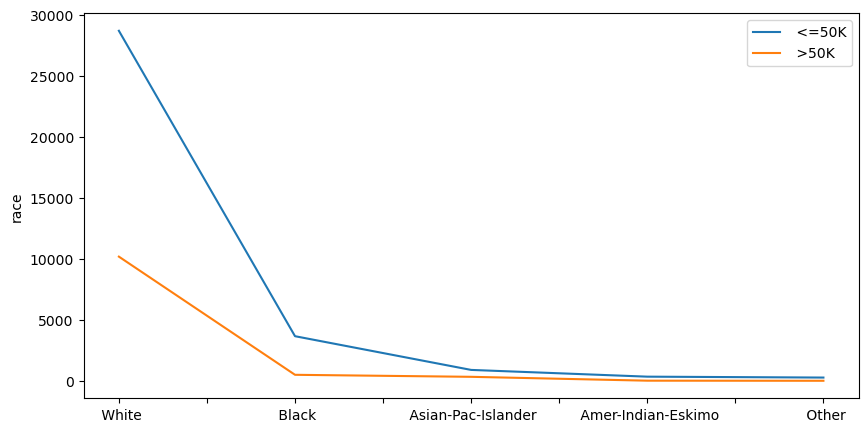

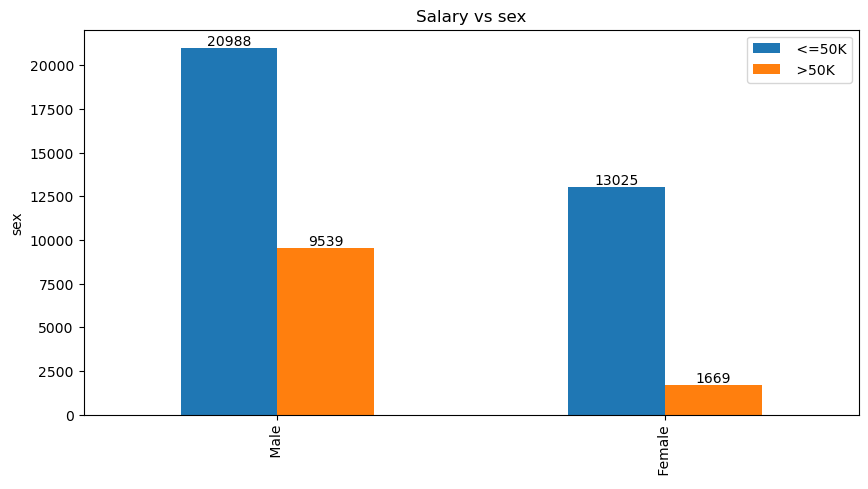

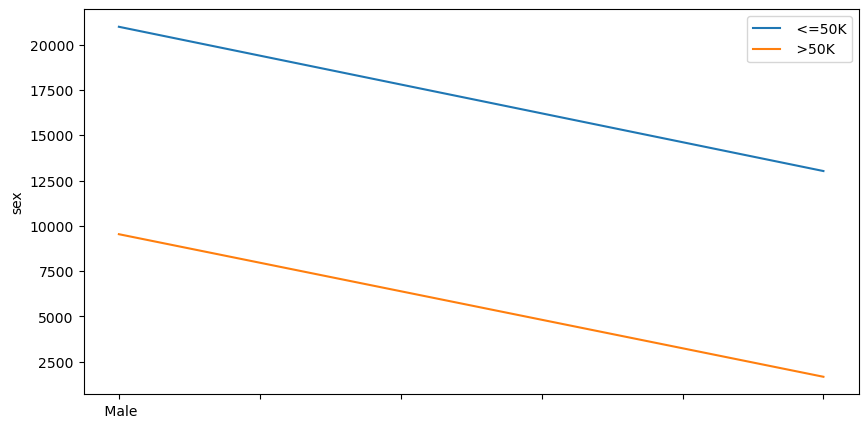

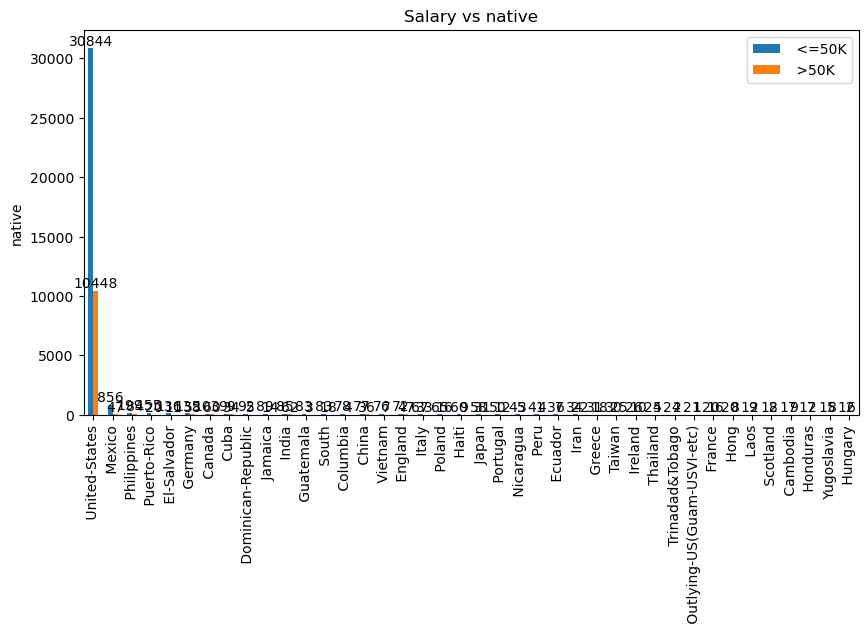

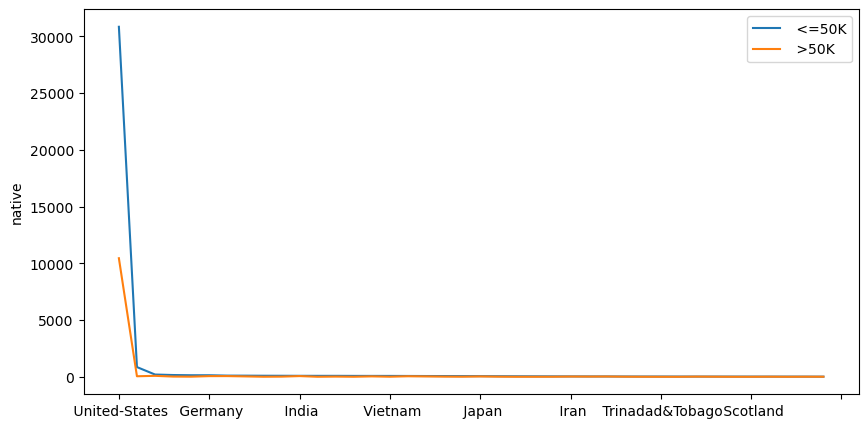

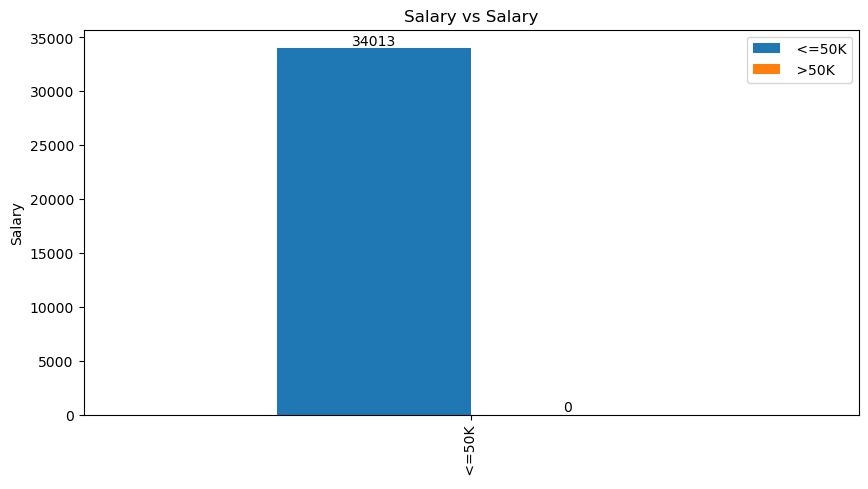

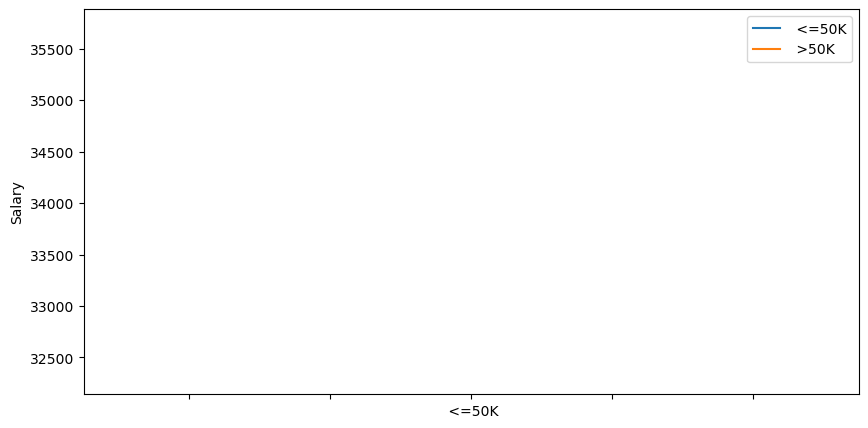

In [29]:
for i in cat_features:
    a=pd.DataFrame()
    a[' <=50K'] = data[data['Salary'] == ' <=50K'][i].value_counts()
    a[' >50K'] = data[data['Salary'] == ' >50K'][i].value_counts()
    ax=a.plot.bar(title='Salary vs ' + i,figsize=(10,5),ylabel=i,)
    a.plot(figsize=(10,5))
    plt.ylabel(i)
    for b in ax.containers:
        ax.bar_label(b,)

In [30]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [31]:
train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [33]:
train.dropna(axis=0,inplace=True)

In [34]:
df=train.copy()
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [36]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [37]:
df1=test.copy()

In [38]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [39]:
le=LabelEncoder()

df["workclass"]=le.fit_transform(df["workclass"])
df['education']=le.fit_transform(df['education'])
df['maritalstatus']= le.fit_transform(df['maritalstatus'])
df["sex"]=le.fit_transform(df["sex"])
df["race"]=le.fit_transform(df["race"])
df["occupation"]=le.fit_transform(df["occupation"])
df["relationship"]=le.fit_transform(df["relationship"])
df["native"]=le.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)

df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [40]:
le=LabelEncoder()

df1["workclass"]=le.fit_transform(df1["workclass"])
df1['education']=le.fit_transform(df1['education'])
df1['maritalstatus']= le.fit_transform(df1['maritalstatus'])
df1["sex"]=le.fit_transform(df1["sex"])
df1["race"]=le.fit_transform(df1["race"])
df1["occupation"]=le.fit_transform(df1["occupation"])
df1["relationship"]=le.fit_transform(df1["relationship"])
df1["native"]=le.fit_transform(df1["native"])
df1['Salary'] = np.where(df1['Salary'].str.contains(" >50K"), 1, 0)

df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [41]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [42]:
x=df.drop(labels= 'Salary', axis = 1)
y=df.Salary
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
29983,41,2,11,9,4,11,3,4,1,0,0,40,37
16584,21,2,8,11,2,2,0,4,1,0,2603,40,37
771,17,2,1,7,4,11,3,4,1,0,0,20,37
20597,50,2,15,10,0,12,1,4,0,0,0,36,37
4294,56,2,9,13,2,0,0,4,1,0,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,36,5,11,9,6,3,1,4,0,0,0,40,37
23782,37,2,15,10,2,6,0,4,1,3464,0,40,37
28988,44,2,6,5,0,2,1,4,1,0,0,40,37
7285,73,1,12,14,2,9,0,4,1,0,0,10,29


In [45]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (21112, 13)
Shape of X_test:  (9049, 13)
Shape of y_train:  (21112,)
Shape of y_test (9049,)


In [46]:
def g_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        #sn.heatmap(confusion_matrix(y_train, pred),annot=True)
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        sn.heatmap(confusion_matrix(y_test, pred),annot=True)

Train Result:
Accuracy Score: 77.49%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.787025     0.642332  0.774915      0.714678      0.751009
recall         0.960144     0.215985  0.774915      0.588064      0.774915
f1-score       0.865008     0.323270  0.774915      0.594139      0.730163
support    15857.000000  5255.000000  0.774915  21112.000000  21112.000000
_______________________________________________
Confusion Matrix: 
 [[15225   632]
 [ 4120  1135]]

Test Result:
Accuracy Score: 76.83%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.783585     0.602094  0.768262     0.692840      0.738398
recall        0.955268     0.204172  0.768262     0.579720      0.768262
f1-score      0.860951     0.304939  0.768262     0.582945      0.722516
support    6796.00

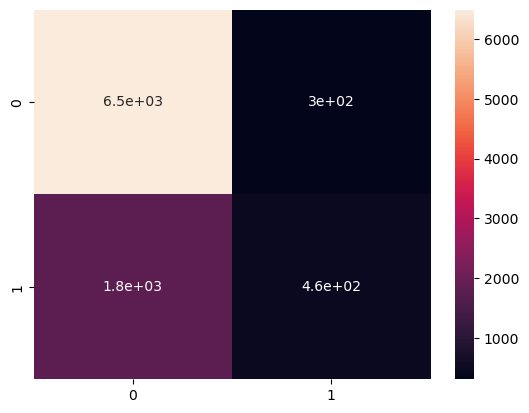

In [47]:
mb = MultinomialNB()
mb.fit(x_train,y_train)

g_score(mb, x_train, y_train, x_test,y_test, train=True)
g_score(mb, x_train, y_train, x_test,y_test, train=False)

Train Result:
Accuracy Score: 79.47%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.809964     0.682106  0.794667      0.746035      0.778139
recall         0.949360     0.327878  0.794667      0.638619      0.794667
f1-score       0.874140     0.442874  0.794667      0.658507      0.766793
support    15857.000000  5255.000000  0.794667  21112.000000  21112.000000
_______________________________________________
Confusion Matrix: 
 [[15054   803]
 [ 3532  1723]]

Test Result:
Accuracy Score: 79.36%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.809082     0.678737  0.793568     0.743910      0.776629
recall        0.949088     0.324456  0.793568     0.636772      0.793568
f1-score      0.873510     0.439039  0.793568     0.656275      0.765337
support    6796.00

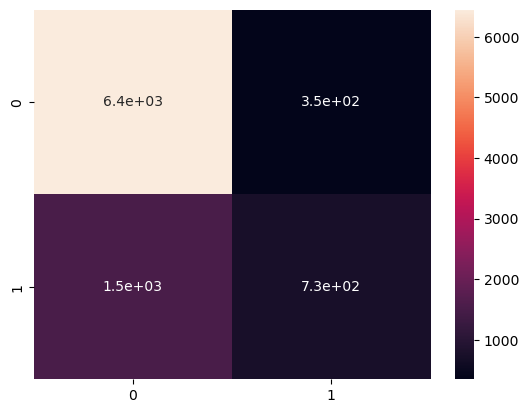

In [48]:
gb = GaussianNB()
gb.fit(x_train,y_train)

g_score(gb, x_train, y_train, x_test,y_test, train=True)
g_score(gb, x_train, y_train, x_test,y_test, train=False)

Train Result:
Accuracy Score: 85.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.886698     0.745583  0.856432      0.816141      0.851573
recall         0.927351     0.642436  0.856432      0.784893      0.856432
f1-score       0.906569     0.690177  0.856432      0.798373      0.852707
support    15857.000000  5255.000000  0.856432  21112.000000  21112.000000
_______________________________________________
Confusion Matrix: 
 [[14705  1152]
 [ 1879  3376]]

Test Result:
Accuracy Score: 85.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.885439     0.754737  0.857995     0.820088      0.852897
recall        0.931430     0.636485  0.857995     0.783957      0.857995
f1-score      0.907852     0.690585  0.857995     0.799219      0.853758
support    6796.00

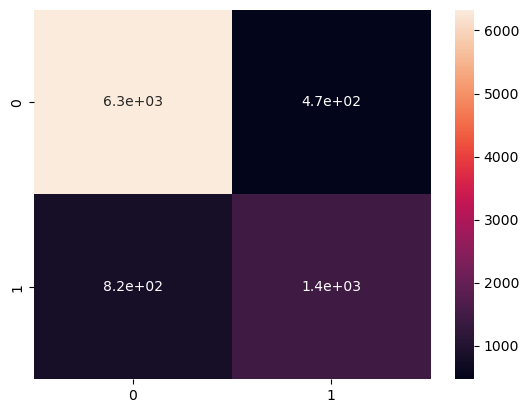

In [49]:
cb = CategoricalNB()
cb.fit(x_train,y_train)

g_score(cb, x_train, y_train, x_test,y_test, train=True)
g_score(cb, x_train, y_train, x_test,y_test, train=False)

In [50]:
x_test1=df1.drop(labels= 'Salary', axis = 1)
y_test1=df1.Salary
x_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


Train Result:
Accuracy Score: 85.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.886698     0.745583  0.856432      0.816141      0.851573
recall         0.927351     0.642436  0.856432      0.784893      0.856432
f1-score       0.906569     0.690177  0.856432      0.798373      0.852707
support    15857.000000  5255.000000  0.856432  21112.000000  21112.000000
_______________________________________________
Confusion Matrix: 
 [[14705  1152]
 [ 1879  3376]]

Test Result:
Accuracy Score: 85.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.887681     0.741541  0.856707      0.814611      0.851777
recall         0.927377     0.639730  0.856707      0.783553      0.856707
f1-score       0.907095     0.686883  0.856707      0.796989      0.852992
support   

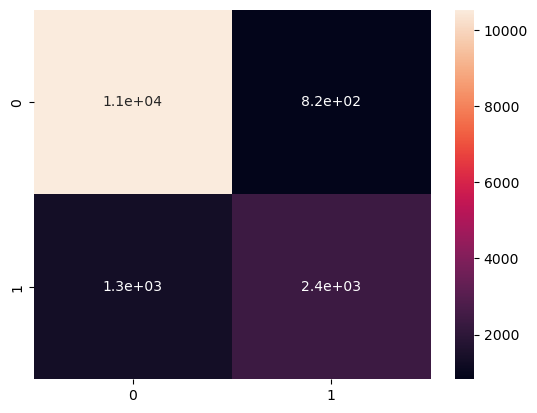

In [51]:
cb = CategoricalNB()
cb.fit(x_train,y_train)

g_score(cb, x_train, y_train, x_test1,y_test1, train=True)
g_score(cb, x_train, y_train, x_test1,y_test1, train=False)

[[10535   825]
 [ 1333  2367]]


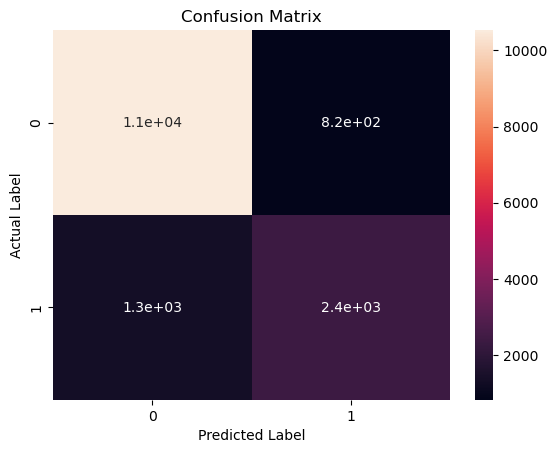

In [52]:
y_pred=cb.predict(x_test1)
cm=confusion_matrix(y_test1,y_pred)
print(cm)
sn.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [53]:
y_pred_prob = cb.predict_proba(x_test1)[0:10]

y_pred_prob

array([[9.99999239e-01, 7.60737428e-07],
       [7.83908418e-01, 2.16091582e-01],
       [6.68534527e-01, 3.31465473e-01],
       [1.77187546e-02, 9.82281245e-01],
       [9.99992476e-01, 7.52401088e-06],
       [5.45824176e-04, 9.99454176e-01],
       [9.99992360e-01, 7.64011639e-06],
       [9.92304594e-01, 7.69540593e-03],
       [3.33392955e-01, 6.66607045e-01],
       [2.39920584e-01, 7.60079416e-01]])

In [54]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Salary <=50k (0)', 'Prob of - Salary >50k (1)'])

y_pred_prob_df

,Prob of - Salary <=50k (0),Prob of - Salary >50k (1)
0,0.999999,7.607374e-07
1,0.783908,2.160916e-01
2,0.668535,3.314655e-01
3,0.017719,9.822812e-01
4,0.999992,7.524011e-06
5,0.000546,9.994542e-01
6,0.999992,7.640116e-06
7,0.992305,7.695406e-03
8,0.333393,6.666070e-01
9,0.239921,7.600794e-01
